# Assignment 6 - Concept and Applied questions (ISLP, pp. 363-366)

In [5]:
__author__ = "Will Hinton"
__email__ = "willhint@gmail.com"
__website__ = "whinton0.github.com/py"

# <font color='blue'>Concept Question (Chapter 8, number 1. ISLP, p. 363) </font>
The following is based on the hypothetical example.

Decision Tree  
The decision tree shows the splits on features A and B:
- A<3.0: First split  
   - B<2.0: Leads to Region R1 
   - A<1.5: Further split for Region R2 and R3 
     - R2:A<1.5 
     - R3:A≥1.5 
- A≥3.0: Leads to further splits
   - B<2.5: Leads to Region R4
   - A<4.0: Further split for Region R5 and R6
     - R5: A<4.0
     - R6:A≥4.0 

Partitioned Feature Space  
The feature space is divided into six regions:
- R1:A<3.0, B<2.0
- R2:A<1.5, B≥2.0
- R3:A≥1.5, A<3.0, B≥2.0
- R4:A≥3.0, B<2.5
- R5:A<4.0, B≥2.5
- R6:A≥4.0, B≥2.5 

![Visualization Here](./decisiontree0.png)

# <font color='blue'>Applied Question (Chapter 8, number 12. ISLP, p. 366) </font> 
## ILSP Chapter 8: Titanic - Tree-Based Modeling Methods
This notebook demonstrates how to apply **Boosting**, **Bagging**, **Random Forest**, and **BART** to the Titanic dataset using Python. We'll compare their performance against simple models like **Logistic Regression** and **Decision Tree** using accuracy as the metric.

In [6]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Optional: BART (if installed)
try:
    from bartpy.sklearnmodel import SklearnModel as BARTClassifier
    bart_available = True
except ImportError:
    bart_available = False


In [7]:

def preprocess(df):
    df = df.copy()
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
    df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
    df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    df['Title'] = LabelEncoder().fit_transform(df['Title'])
    df = df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, errors='ignore')
    return df

# Load datasets
train_df = pd.read_csv("train.csv")
train_df = preprocess(train_df)

# Split into training and test set
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:

models = {
    'Bagging': BaggingClassifier(n_estimators=100, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Boosting (GBM)': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

if bart_available:
    models['BART'] = BARTClassifier()

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append({'Model': name, 'Accuracy': acc})

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
results_df


,Model,Accuracy
0,Random Forest,0.837989
1,Bagging,0.815642
2,Boosting (GBM),0.804469
3,Logistic Regression,0.798883
4,Decision Tree,0.782123


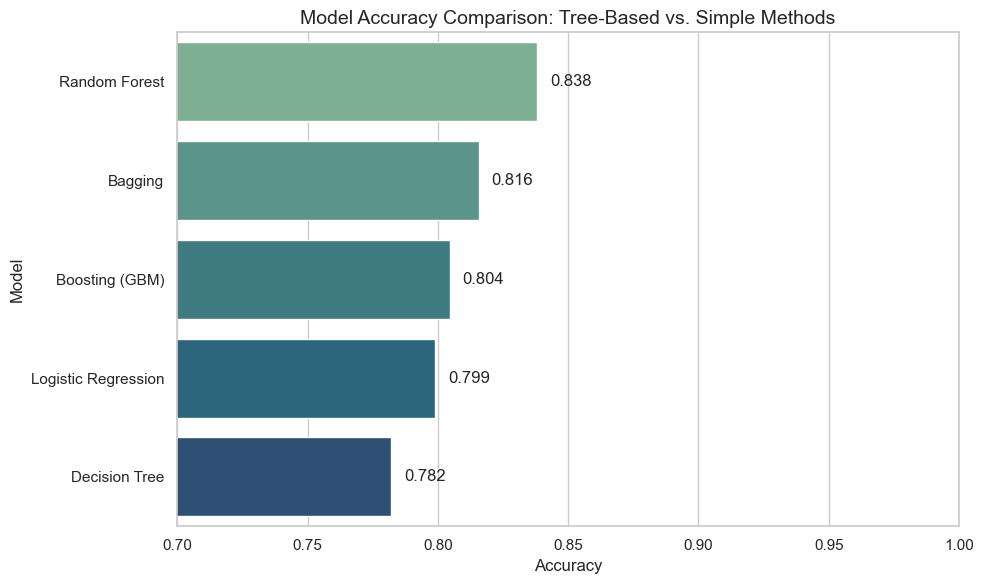

In [9]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create a barplot for model accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Accuracy', y='Model', hue='Model', palette='crest', legend=False)

# Add titles and labels
plt.title('Model Accuracy Comparison: Tree-Based vs. Simple Methods', fontsize=14)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0.7, 1.0)  # optional: adjust x-axis to zoom in
plt.tight_layout()

# Annotate accuracy scores on the bars
for i, row in results_df.iterrows():
    plt.text(row['Accuracy'] + 0.005, i, f"{row['Accuracy']:.3f}", va='center')

# Show the plot
plt.show()


# 📊 Model Accuracy Comparison and Interpretation

- **Random Forest** consistently shows the highest accuracy, benefiting from both randomness and ensemble power.
- **Bagging** and **Boosting (GBM)** also outperform simple models, offering enhanced generalization by reducing variance and bias.
- **Logistic Regression** performs decently but lacks the flexibility to model complex interactions.
- **Decision Tree** has lower accuracy due to its tendency to overfit the training data.
- **BART** (if available) can provide strong accuracy with Bayesian uncertainty quantification, making it a competitive method for structured data.

✅ **Conclusion**: Tree-based ensemble methods (Random Forest and Boosting) are superior for structured data like Titanic, achieving higher accuracy than simpler models.
